*5. Let’s use the newly created modules in unsupervised to cluster some toy data.*

In [7]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
# Import the classes from the unsupervised package
file_path = os.getcwd()
parent_path = Path(file_path)
parent_path = parent_path.parent.as_posix()
sys.path.append(str(parent_path +'/Unsupervised_model'))

from KMeans import KMeans
from Kmedoids import KMedoids

**a. Use the following code snippet to create scattered data X**

In [3]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

**b. Plot the resulting dataset. How many clusters are there? How far are they from one another?**

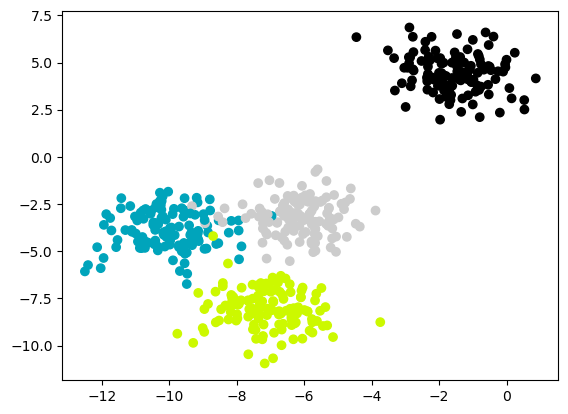

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

Based on the scatter plot, there are four clusters, and they are somewhat far apart from each other, but three of them are closer and there is one more distant

**c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.**

In [8]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4)

# fit the data & predict cluster labels
kmeans.fit(X)
y_pred = kmeans.predict(X)

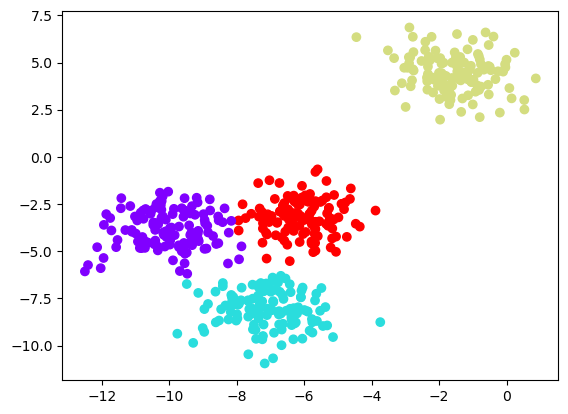

In [9]:

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')
plt.show()